 Proyek Analisis Data : Ecommerce Public Dataset


*   Nama : Kresna Fajri Wicaksana
*   Email : kresna.fajri@gmail.com
*   ID Dicoding : Kresna Fajri

Menentukan Pertanyaan Bisnis


1. Ada berapa jumlah pelanggan di tiap daerah/state?
2. Pembeli terbanyak ada di state mana?  
3. Apakah ada barang yang tidak sampai pada pelanggan?Jika ada, di
   negara bagian/kota mana saja?
4. Produk apa yang memiliki harga   tertinggi dan produk apa yang memiliki harga terendah
5. Apakah ada korelasi antara volume
  barang pesanan dengan ongkir? Jika ada bagaimana korelasinya?
6. Barang apa saja yang paling laris dan barang apa yang paling tidak laku?

# Proses Import paket


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns


In [2]:
%pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import streamlit as st

Kita akan membuat abs_path untuk memudahkan proses pembacaan data dari direktori

# **# Data Wrangling**

**Gathering Data**

In [4]:
customer_df = pd.read_csv('./Data Source/customers_dataset.csv' ,engine ="python")
orderitem_df = pd.read_csv("./Data Source/order_items_dataset.csv")
orderpayment_df = pd.read_csv("./Data Source/order_payments_dataset.csv")
orders_df = pd.read_csv("./Data Source/orders_dataset.csv",engine="python")
category_name_df = pd.read_csv("./Data Source/product_category_name_translation.csv")
order_reviews_df=pd.read_csv("./Data Source/order_reviews_dataset.csv")
seller_df = pd.read_csv("./Data Source/sellers_dataset.csv",engine="python")
product_df = pd.read_csv("./Data Source/products_dataset.csv",engine="python")
geolocation_df =pd.read_csv("./Data Source/geolocation_dataset.csv")

**Data Assessing**

Dilakukan pengaksesan pada data, dengan melihat 5 data teratas, informasi, dan juga tendensi sentral data. Dimulai dari data customer_df

In [5]:
#Akan dilakukan proses impor dan pembacaan data
print(customer_df.head(5))
print(customer_df.info())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count

Selanjutnya, kita cek deskripsi statistik singkat, jumlah NaN dan juga jumlah duplikasi pada dataset. 

In [6]:
print("deskripsi statistik pada customer_df \n")

print(customer_df.describe(include="all"))

print(f'Jumlah NaN values pada dataframe customer_df yaitu {customer_df.isna().sum()}')
print(f'Jumlah duplikasi pada dataframe customer_df yaitu {customer_df.duplicated().sum()} ')

deskripsi statistik pada customer_df 

                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_cod

Diketahui bahwa data customer_df telah bersih, tidak ada data yang terduplikasi atau memiliki nilai NaN. Dilanjutkan dengan akses data orderitem_df

In [7]:
#baca 5 data teratas orderitem_df
orderitem_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
print(f'Jumlah NaN values pada dataframe orderitem_df yaitu {orderitem_df.isna().sum()}')
print(f'Jumlah duplikasi pada dataframe orderitem_df yaitu {orderitem_df.duplicated().sum()}')

Jumlah NaN values pada dataframe orderitem_df yaitu order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


Jumlah duplikasi pada dataframe orderitem_df yaitu 0


In [9]:
print(f'Deskripsi data singkat \n{orderitem_df.describe()}')

Deskripsi data singkat 
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000


Ada data-data outlier, akan dilakukan pengecekan terhadap data price dan juga freight value di dataframe orderitem_df. Pengecekan akan dilakukan di segmen **Cleaning Data**

In [10]:
#Lanjutkan lagi dengan order payment
print(orderpayment_df.head(5))


                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  


In [11]:
#cek info orderpayment_df dan cek duplicates dan NaN value
print(f'Jumlah data terduplikasi : {orderpayment_df.duplicated().sum()}')
print(f'Jumlah NaN value : {orderpayment_df.isna().sum()}')
#Data clean
print(orderpayment_df.describe())

Jumlah data terduplikasi : 0
Jumlah NaN value : order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000


Tidak ada duplikasi data, dan tidak ada NaN. Ada dugaan terdapat outlier pada orderpayment_df, akan dilakukan pengecekan lebih lanjut di **Cleaning Data** saat ini kita akan lanjut assessing data. Selanjutnya kita akan mengakses data orders_df

In [12]:

print(f"Informasi dataset order_df{orders_df.info()}\n\n-----------------------\n\n")
print(f'Jumlah NaN values pada dataframe orders_df yaitu {orders_df.isna().sum()}')
print(f'Jumlah duplikasi pada dataframe orders_df yaitu {orders_df.duplicated().sum()}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Informasi dataset order_dfNone

-----------------------


Jumlah NaN values pada dataframe orders_df yaitu order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
ord

In [13]:
print(orders_df.describe(include="all"))

                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08

Nampaknya semua data sudah sesuai di orders_df. Kita lanjutkan untuk mengakses data product_df

In [14]:
#Cetak info singkat dataset product_df
print(product_df.info())
print(f'Jumlah NaN values pada dataframe product_ yaitu {product_df.isna().sum()}')
print(f'Jumlah duplikasi pada dataframe product_df yaitu {product_df.duplicated().sum()}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
Jumlah NaN values pada dataframe product_ yaitu product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty      

Data Product_df aman, kita akan lanjutkan ke data category_name_df

In [15]:
print(category_name_df.isna().sum())
print(f"Jumlah data terduplikasi :{category_name_df.duplicated().sum()}")

product_category_name            0
product_category_name_english    0
dtype: int64
Jumlah data terduplikasi :0


In [16]:
category_name_df.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


Data category_name_df berisi data nama produk yang diperjualbelikan di Ecommerce dengan bahasa portugal dan juga bahasa Inggris. Kita berpindah ke data sellers_df.

In [17]:
#Langsung ke seller dataset
seller_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [18]:
seller_df.describe()
print(f"Jumlah nilai terduplikasi : {seller_df.duplicated().sum()}")
print(f"Jumlah nilai NaN : {seller_df.isna().sum()}")

Jumlah nilai terduplikasi : 0
Jumlah nilai NaN : seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


In [19]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


data sellers_df berisi kode zip penjual, kota penjual, dan juga negara bagian tempat penjualan produk yang dijual lewat ECommerce. Berikutnya kita akan mencoba mencari tahu isi dari data GeoLocation Dataset dalam geolocation_df

In [20]:
#Geolocation_dataset

print(geolocation_df.describe())
print(geolocation_df.info())

       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng       

In [21]:
#cek duplikasi sm NaN value
print(f"Jumlah nilai terduplikasi : {geolocation_df.duplicated().sum()}")
print(f"Jumlah nilai NaN : {geolocation_df.isna().sum()}")

#Data yang terduplikasi ada 261831, diwajarkan karena bisa jadi lokasi pengiriman barang berbeda tapi letak koordinat dan ketinggiannya sama.

Jumlah nilai terduplikasi : 261831
Jumlah nilai NaN : geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


Ada 261831 nilai terduplikasi. Namun hal ini bisa jadi masuk akal karena data gelocation dari tiap penjual yang mungkin saja sama. Kita akan mencoba melihat data order_reviews_df berikut

In [22]:
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [23]:
print(f"Jumlah data terduplikasi : {order_reviews_df.duplicated().sum()}")
print(f"Jumlah NaN value:{order_reviews_df.isna().sum()}")
#Lakukan cleaning data pada review comment message dan comment_title
order_reviews_df.dropna(how="any",inplace=True)
#Ayo cek ulang
order_reviews_df.isna().sum()

Jumlah data terduplikasi : 0
Jumlah NaN value:review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

NaN value yang berada di review_comment_title dan juga review_comment_message bisa jadi memang bukan nilai angka. NaN artinya Not A Number. Karena dataset ini berisi komentar dan review dari para pelanggan, pastilah datanya bertipe string. Selanjutnya kita akan mulai proses cleaning data pada beberapa dataset yang bermasalah.

# **Cleaning Data**

Kecurigaan pertama tentang munculnya outlier ada pada orderitem_df, akan dicek terlebih dahulu. Akan dibuat sebuah fungsi check_outlier dengan input berupa nama database dan juga kolom yang ingin dicek. Output berupa nilai max dan atau min dari data jika memang datanya melampaui ambang batas. Jika tidak ditemukan outlier. Fungsi akan menghasilkan output string "Tidak ditemukan outlier".

Kita mulai pengecekan data pada database yang diduga memiliki outlier yaitu orderitem_df pada price dan juga freight_value 

In [24]:

def check_outlier (database_name,column_name):
    Q1,Q2,Q3 =database_name[column_name].quantile([0.25,0.50,0.75])

    IQR = Q3-Q1
    print(f'Nilai IQR yaitu +IQR : {IQR}')

    tolerable_Max = Q3 + 1.5*IQR
    tolerable_Min = Q1 - 1.5*IQR
    print(f'Nilai maks yang bisa ditolerir {tolerable_Max} dan nilai minimum data yang bisa ditolerir {tolerable_Min}')

    #Nilai Harga tidak mungkin negatif, kita akan cleaning hanya data diatas Max saja.Untuk data minimum kemungkinan akan kita beri nilai 1
    kondisi_lower_than = database_name[column_name].min() < tolerable_Min
    kondisi_higher_than = database_name[column_name].max() > tolerable_Max

    #max_value_from_df = database_name[column_name].max()
    #min_value_from_df = database_name[column_name].min()
    if kondisi_lower_than == True or kondisi_higher_than == True:
        return (f'Ditemukan nilai max yaitu {database_name[column_name].max()}, dan nilai minimum {database_name[column_name].min()} yang melewati ambang batas')
    else:
        return "tidak ada outlier"
    



In [25]:
print(check_outlier(orderitem_df,'price'))

Nilai IQR yaitu +IQR : 95.0
Nilai maks yang bisa ditolerir 277.4 dan nilai minimum data yang bisa ditolerir -102.6
Ditemukan nilai max yaitu 6735.0, dan nilai minimum 0.85 yang melewati ambang batas


Masih dengan database yang sama, kita cek dengan freight_valuenya. 

In [26]:
print(check_outlier(orderitem_df,'freight_value'))
orderitem_df.mask(orderitem_df['freight_value']>36.95,36.95,inplace =True)
orderitem_df.describe()

Nilai IQR yaitu +IQR : 8.069999999999999
Nilai maks yang bisa ditolerir 33.254999999999995 dan nilai minimum data yang bisa ditolerir 0.9750000000000032
Ditemukan nilai max yaitu 409.68, dan nilai minimum 0.0 yang melewati ambang batas


C:\Users\INTEL\AppData\Local\Temp\ipykernel_19324\2895803803.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '36.95' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  orderitem_df.mask(orderitem_df['freight_value']>36.95,36.95,inplace =True)


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,4.140007,98.633102,18.157007
std,9.844996,130.308614,8.175698
min,1.000000,0.850000,0.000000
25%,1.000000,36.950000,13.080000
50%,1.000000,59.900000,16.260000
75%,1.000000,117.700000,21.150000
max,36.950000,3999.900000,36.950000


Masalah terselesaikan!

# Exploratory Data Analysis

Analisis data pertama, kita mulai dengan data customer_df yang telah dibersihkan. Akan dilakukan pencetakan data untuk melihat komponen nya ada apa saja.

In [27]:
#kita akan mengecek data order yg sudah clean terlebih dahulu
customer_df.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


Selanjutnya, kita akan golongkan berdasarkan kota pelanggan dan negara bagian. Karena tiap pelanggan pasti memiliki ID yang berbeda, jadi kita gunakan kode "nunique" untuk menghitung jumlah kode unik nya

In [28]:
#golongkan berdasarkan customer_city dan customer_state
#Tiap user/pelanggan dari E-commerce ini pasti memiliki unique ID untuk membedakan. Maka kita gunakan nunique utk menghitung jumlah kode unique yg ada
customer_df.groupby(by=["customer_state","customer_city"]).agg({
    "customer_unique_id" : "nunique",
})


customer_unique_id
customer_state customer_city                              
AC             brasileia                                 1
               cruzeiro do sul                           3
               epitaciolandia                            1
               manoel urbano                             1
               porto acre                                1
...                                                    ...
TO             silvanopolis                              1
               sitio novo do tocantins                   1
               taguatinga                                3
               tocantinopolis                            7
               xambioa                                   3

[4310 rows x 1 columns]

Sebagaimana tercantum pada tabel diatas, tiap kota di tiap negara bagian telah terkumpul dan telah terdata jumlah pelanggannya. Berikutnya kita akan mencoba mengecek jumlah pelanggan di tiap kotanya, sekaligus juga untuk menjawab **pertanyaan bisnis 1** yang telah dijabarkan di awal

In [29]:
customer_df.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
                  ...  
ibertioga             1
ibiajara              1
ibiara                1
ibicuitinga           1
lagoao                1
Name: customer_unique_id, Length: 4119, dtype: int64

Wow, kita telah berhasil menampilkan data semua pelanggan/user dari aplikasi E-commerce milik kita dan membaginya berdasarkan kota. Berdasarkan data, diketahui bahwa pelanggan terbanyak berasal dari Sao Paulo, disusul dengan pelanggan dari Rio de Janeiro dan urutan ketiga Belo Horizonte. Sehingga **Pertanyaan 1** telah **terjawab**

Selanjutnya kita akan melihat negara bagian mana saja yang memiliki aplikasi E-commerce dan pernah melakukan transaksi didalamnya


In [30]:
customer_df.groupby(by='customer_state').customer_unique_id.nunique().sort_values(ascending = False)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

Diketahui bahwa pelanggan terbanyak berasal dari kode state SP (Sao Paulo) dengan jumlah pelanggan 40302. Maka **Pertanyaan ke -2 (Negara bagian dengan Jumlah Pelanggan terbanyak)** telah **terjawab**

Selanjutnya akan dicoba untuk melihat data lain, siapa tahu kita bisa memperoleh informasi tambahan. Saat ini akan ditampilkan data dari orders_df

In [31]:
#Akan kita coba kaitkan dengan data order
orders_df


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [32]:
#Kita akan coba gabungkan antara data order dengan data customer. untuk melihat apakah barang yg dipesan pelanggan telah terkirim semua atau tidak
#They have something in common : customer_id
order_customer_df = pd.merge(
    left = orders_df,
    right = customer_df,
    how = "left",
    left_on = "customer_id",
    right_on = "customer_id"
)

order_customer_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [33]:
#mari kita lihat, adakah barang yg tidak terkirim/tersasar?
order_customer_df.groupby(by = "order_status").customer_id.count()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: customer_id, dtype: int64

Berdasarkan hasil pengelompokan, diketahui bahwa ada 96455 paket yang terkirim dan ada 6 paket yang dibatalkan transaksinya oleh pengguna aplikasi. Dengan demikian pertanyaan bisnis **ke-3** telah **terjawab**

In [34]:
#Ternyata ada yg dicancel, daerah mana itu?
order_customer_df.groupby(by=["order_status","customer_state"]).agg({
    "customer_id":"nunique"
})

customer_id
order_status customer_state             
approved     MG                        1
             SP                        1
canceled     AL                        1
             BA                       16
             CE                        7
...                                  ...
unavailable  RS                       24
             SC                       18
             SE                        4
             SP                      292
             TO                        1

[149 rows x 1 columns]

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.groupby.generic.DataFrameGroupBy'>.

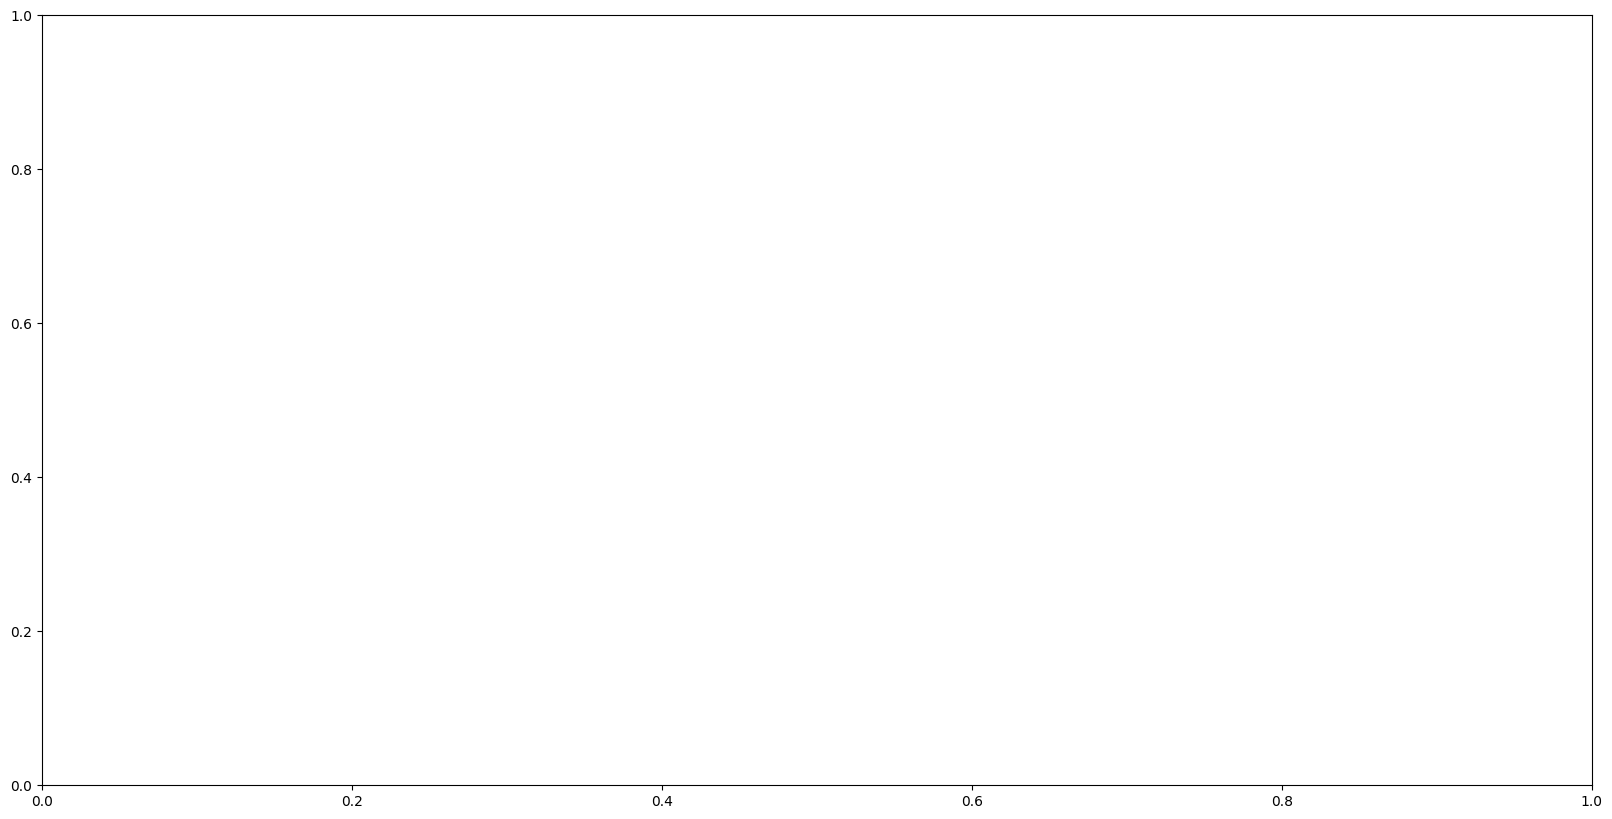

In [52]:
fig, ax = plt.subplots(figsize=(20, 10))
 
sns.barplot(
        y="customer_count", 
        x="customer_state",
        data=order_customer_df.groupby(by="customer_state"),
        ax=ax
    )
ax.set_title("Number of Order Status", loc="center", fontsize=50)
ax.set_ylabel('Number of Order Status')
ax.set_xlabel('State')
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)
plt.show()

Berdasarkan data, ada beberapa barang yang dicancel yang usernya tinggal di negara bagian SP, SC,RJ, dan MG. Selanjutnya kita akan coba lihat, barang-barang apa saja yang dipesan dan berapa harganya?


In [35]:
orderitem_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1.00,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1.00,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1.00,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1.00,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.00,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1.00,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1.00,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,36.95,36.95,36.95,36.95,36.95,36.95,36.95
8,0005a1a1728c9d785b8e2b08b904576c,1.00,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1.00,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


Data yang beragam dengan ongkir yang bervariasi juga. Sepertinya kita bisa menggabungkan antara data harga ini dengan data jenis barang. Berikut adalah bentuk tabelnya

In [36]:
product_orderItem_df = pd.merge(
    left=product_df,
    right=orderitem_df,
    how = "right",
    left_on="product_id",
    right_on="product_id"
)

product_orderItem_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,00010242fe8c5a6d1ba2dd792cb16214,1.00,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,00018f77f2f0320c557190d7a144bdd3,1.00,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,000229ec398224ef6ca0657da4fc703e,1.00,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,7634da152a4610f1595efa32f14722fc,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,00024acbcdf0a6daa1e931b038114c75,1.00,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,00042b26cf59d7ce69dfabb4e55b4fd9,1.00,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,36.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.95,36.95,36.95,36.95,36.95,36.95
112646,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,fffcd46ef2263f404302a634eb57f7eb,1.00,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,72a30483855e2eafc67aee5dc2560482,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,fffce4705a9662cd70adb13d4a31832d,1.00,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,fffe18544ffabc95dfada21779c9644f,1.00,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


Kita berhasil menggabungkan antara dataset product dan dataset orderItem. Selanjutnya kita akan mencari insight dengan cara menggolongkan harga berdsarkan kategori barang

In [37]:
product_orderItem_df.groupby(by="product_category_name").price.nunique().sort_values(ascending = False).reset_index()

,product_category_name,price
0,beleza_saude,1202
1,esporte_lazer,1063
2,utilidades_domesticas,999
3,informatica_acessorios,952
4,relogios_presentes,819
...,...,...
68,casa_conforto_2,5
69,fashion_roupa_infanto_juvenil,4
70,pc_gamer,3
71,cds_dvds_musicais,2


Hmm.. Kategorinya pake bahasa Spanyol/Portugis, tapi gapapa, disini terlihat bahwa beleza_saude atau Beauty Health atau produk kecantikan memiliki harga tertinggi(1263). Diikuti dengan esporte lazer atau alat-alat olahraga, dan pada urutan ketiga adalah aksesoris komputer dengan nilai 1003 Brazilian Real, dan pada urutan terakhir yaitu CD/DVD Music dengan harga 2 Brazilian Real. Dari data ini, **pertanyaan ke 4** telah **terjawab**. Selanjutnya akan kita cek berat barang barang dengan Price (harga) dan Freight Value (ongkir)

In [38]:
#Agar data lebih mudha dibaca, akan dicoba untuk me-replace data product+_category_name yg masih berbahasa portugis menjadi bahasa Inggris
product_orderItem_df.replace(product_orderItem_df["product_category_name"],category_name_df["product_category_name_english"],inplace=True)
product_orderItem_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,00010242fe8c5a6d1ba2dd792cb16214,1.00,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,00018f77f2f0320c557190d7a144bdd3,1.00,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,000229ec398224ef6ca0657da4fc703e,1.00,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,7634da152a4610f1595efa32f14722fc,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,00024acbcdf0a6daa1e931b038114c75,1.00,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,00042b26cf59d7ce69dfabb4e55b4fd9,1.00,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,36.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.95,36.95,36.95,36.95,36.95,36.95
112646,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,fffcd46ef2263f404302a634eb57f7eb,1.00,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,72a30483855e2eafc67aee5dc2560482,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,fffce4705a9662cd70adb13d4a31832d,1.00,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,fffe18544ffabc95dfada21779c9644f,1.00,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


Mari kita coba membuat sebuah kolom baru yaitu "Product_volume" yang berisi volume dari barang-barang yg akan dijual. Untuk mempermudah perhitungan volume, diasumsikan semua barang yg dijual berbentuk balok. Sehingga rumus volume nya : Panjang Produk x Lebar Produk x Tinggi Produk. Karena satuannya dalam cm, maka dimensi volumenya adalah cm kubik.

In [39]:
product_orderItem_df["Product_volume_cm"] = product_orderItem_df["product_length_cm"]*product_orderItem_df["product_width_cm"]*product_orderItem_df["product_height_cm"]
product_orderItem_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,Product_volume_cm
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,00010242fe8c5a6d1ba2dd792cb16214,1.00,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3528.0
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,00018f77f2f0320c557190d7a144bdd3,1.00,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,60000.0
2,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,000229ec398224ef6ca0657da4fc703e,1.00,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,14157.0
3,7634da152a4610f1595efa32f14722fc,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,00024acbcdf0a6daa1e931b038114c75,1.00,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2400.0
4,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,00042b26cf59d7ce69dfabb4e55b4fd9,1.00,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,42000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,36.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.95,36.95,36.95,36.95,36.95,36.95,NaN
112646,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,fffcd46ef2263f404302a634eb57f7eb,1.00,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,44460.0
112647,72a30483855e2eafc67aee5dc2560482,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,fffce4705a9662cd70adb13d4a31832d,1.00,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,9576.0
112648,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,fffe18544ffabc95dfada21779c9644f,1.00,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,8000.0


Kita akan mencari data harga, ongkir dan juga bobot produk. Sehingga bisa dengan mudah dibandingkan antara satu sama lain

In [40]:
product_orderItem_df.groupby(by=["product_category_name"]).agg({
    "price" : "mean",
    "freight_value":"mean",
    "product_weight_g":"mean"
})

,price,freight_value,product_weight_g
product_category_name,,,
agro_industria_e_comercio,274.295355,20.751202,2839.792350
alimentos,56.369297,13.603293,619.757028
alimentos_bebidas,54.453055,15.886655,1077.614545
artes,84.823655,16.814569,1511.558376
artes_e_artesanato,68.522174,13.104783,1131.608696
...,...,...,...
sinalizacao_e_seguranca,85.332346,16.599691,1481.222222
tablets_impressao_imagem,90.703735,14.773494,307.096386
telefonia,68.366872,14.889093,259.231168


Berdasarkan kategori produk, didapatkan data rata-rata berat barang, rata-rata harga dan juga rata-rata ongkir barang2 tersebut. Selanjutnya kita coba mencari berat barang berdasarkan produk kategori


In [41]:
product_orderItem_df.groupby(by="product_category_name").product_weight_g.nunique().sort_values(ascending = False)

product_category_name
esporte_lazer                    549
cama_mesa_banho                  477
utilidades_domesticas            434
beleza_saude                     429
brinquedos                       398
                                ... 
casa_conforto_2                    5
fashion_roupa_infanto_juvenil      5
pc_gamer                           3
seguros_e_servicos                 2
cds_dvds_musicais                  1
Name: product_weight_g, Length: 73, dtype: int64

Berdasarkan berat barang, barang terberat adalah barang-barang olahraga, disusul dengan cama mesa banho (meja,bak mandi,tempat tidur),dan utilidades domesticas (perabot rumah tangga)

Untuk mempermudah, kita akan gabungkan seluruh data dari order_customer_df dengan product_orderItem_df menjadi dataset all_data


In [42]:
all_data = pd.merge(
    left = order_customer_df,
    right = product_orderItem_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)

all_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value,Product_volume_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,500.0,19.0,8.0,13.0,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1976.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,400.0,19.0,13.0,19.0,1.0,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,4693.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,420.0,24.0,19.0,21.0,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,9576.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,450.0,30.0,10.0,20.0,1.0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,6000.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,250.0,51.0,15.0,15.0,1.0,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,11475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112305,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,...,1175.0,22.0,13.0,18.0,1.0,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 09:54:05,72.00,13.08,5148.0
112306,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,4950.0,40.0,10.0,40.0,1.0,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,16000.0
112307,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112308,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Selanjutnya, kita akan mencari jawaban dari pertanyaan-pertanyaan utama berdasarkan dataset ini. Produk apakah yang paling laris yang dibeli oleh orang? dan produk apakah yang paling rendah diminati dan dibeli oleh customer?(**Pertanyaan Bisnis 6**)

In [43]:

all_data.groupby(by="product_category_name").agg({
    "product_id":"nunique",
    "price":"sum"
})

,product_id,price
product_category_name,,
agro_industria_e_comercio,54,50196.05
alimentos,81,28071.91
alimentos_bebidas,102,14974.59
artes,52,16710.26
artes_e_artesanato,18,1576.01
...,...,...
sinalizacao_e_seguranca,85,13823.84
tablets_impressao_imagem,9,7528.41
telefonia,1120,303138.71


In [44]:
grouped =all_data.groupby(by="product_category_name").agg(
    product_count = ("product_id","nunique"),
    revenue = ("price","mean"))
grouped.sort_values('product_count',ascending = [False])

,product_count,revenue
product_category_name,,
cama_mesa_banho,2904,88.424615
esporte_lazer,2703,100.098580
moveis_decoracao,2368,75.780169
beleza_saude,2308,115.929563
utilidades_domesticas,2156,75.120660
...,...,...
casa_conforto_2,5,25.342333
fashion_roupa_infanto_juvenil,5,71.231250
pc_gamer,3,171.772222


Berdasarkan data, diketahui bahwa produk bak mandi dan juga perabot rumah tangga (cama,mesa,banho) adalah produk yang paling sering dibeli oleh pelanggan. Pada urutan kedua ada peralatan olahraga sedangkan produk paling tidak laris yaitu CD/DVD musik, dengan jumlah pembeli 1 orang. Maka dengan ini **Pertanyaan Bisnis 6** telah **terjawab**

# **Data Visualization and Conclusion**

Beberapa pertanyaan bisnis telah terjawab, kini saatnya kita membuat visualisasi data. Kita akan mencoba memvisualisasikan data yang telah kita kelompokkan agar lebih enak dibaca. Kita gunakan data jumlah pengguna aplikasi Ecommerce dengan negara bagian

Berikut ini adalah grafik yang menunjukkan kategori barang yang biasa dibeli dan harga per unitnya


**Membuat fungsi untuk dimasukkan ke dalam grafik**

In [45]:
def create_revenue_df(df):
    product_revenue_df = df.groupby(by="product_category_name").agg({
        "order_id": "nunique",
        "price":"sum"
    })
    product_revenue_df = product_revenue_df.reset_index()
    product_revenue_df.rename(columns={
        "order_id":"order_count",
        "price":"revenue"
    }, inplace = True)

    return product_revenue_df


#create customer distribution 
def customer_distribution(df):
    customer_distribution_df = df.groupby("customer_state").customer_id.nunique().reset_index()
    customer_distribution_df.rename(columns={
         "customer_id":"customer_count"
    },inplace = True)
    return customer_distribution_df


#create comparation product weight vs freight value
def ProductWeight_vs_freight (df):
    compare_weight_freight = df.groupby(by="product_category_name").agg({
        "product_id" : "nunique",
        "freight_value":"sum"
        
    })
    compare_weight_freight.rename(columns={
        "product_id":"product_amount",
        "freight_value":"ongkir"
    },inplace=True)
    return compare_weight_freight

customer_distribution_dataset =customer_distribution(all_data)
revenue_df = create_revenue_df(all_data)
compare_freight = ProductWeight_vs_freight(all_data)

print(compare_freight)

                           product_amount     ongkir
product_category_name                               
agro_industria_e_comercio              54    3797.47
alimentos                              81    6774.44
alimentos_bebidas                     102    4368.83
artes                                  52    3312.47
artes_e_artesanato                     18     301.41
...                                   ...        ...
sinalizacao_e_seguranca                85    2689.15
tablets_impressao_imagem                9    1226.20
telefonia                            1120   66018.24
telefonia_fixa                        109    4121.58
utilidades_domesticas                2156  106210.67

[73 rows x 2 columns]


**Grafik Pendapatan tiap Order**

C:\Users\INTEL\AppData\Local\Temp\ipykernel_19324\63736969.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\INTEL\AppData\Local\Temp\ipykernel_19324\63736969.py:22: UserWarning: 
The palette list has fewer values (5) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


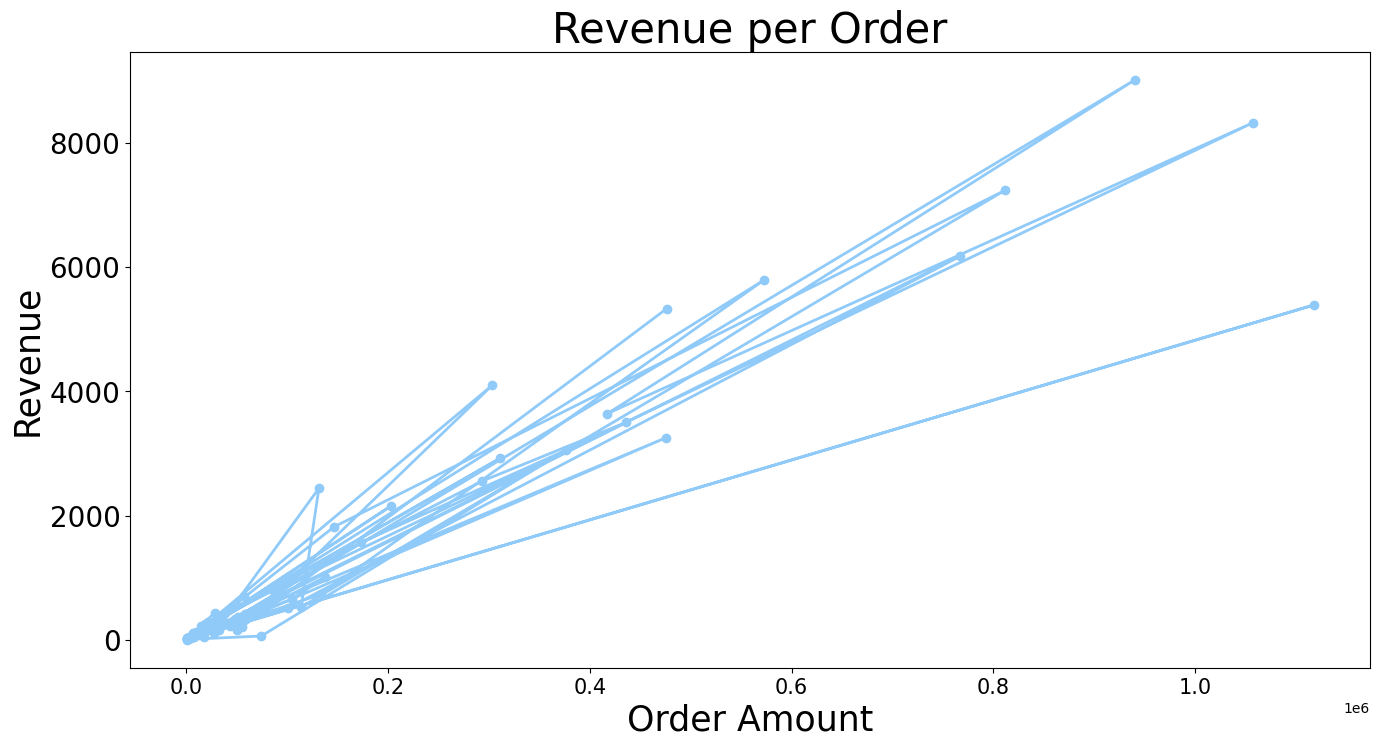

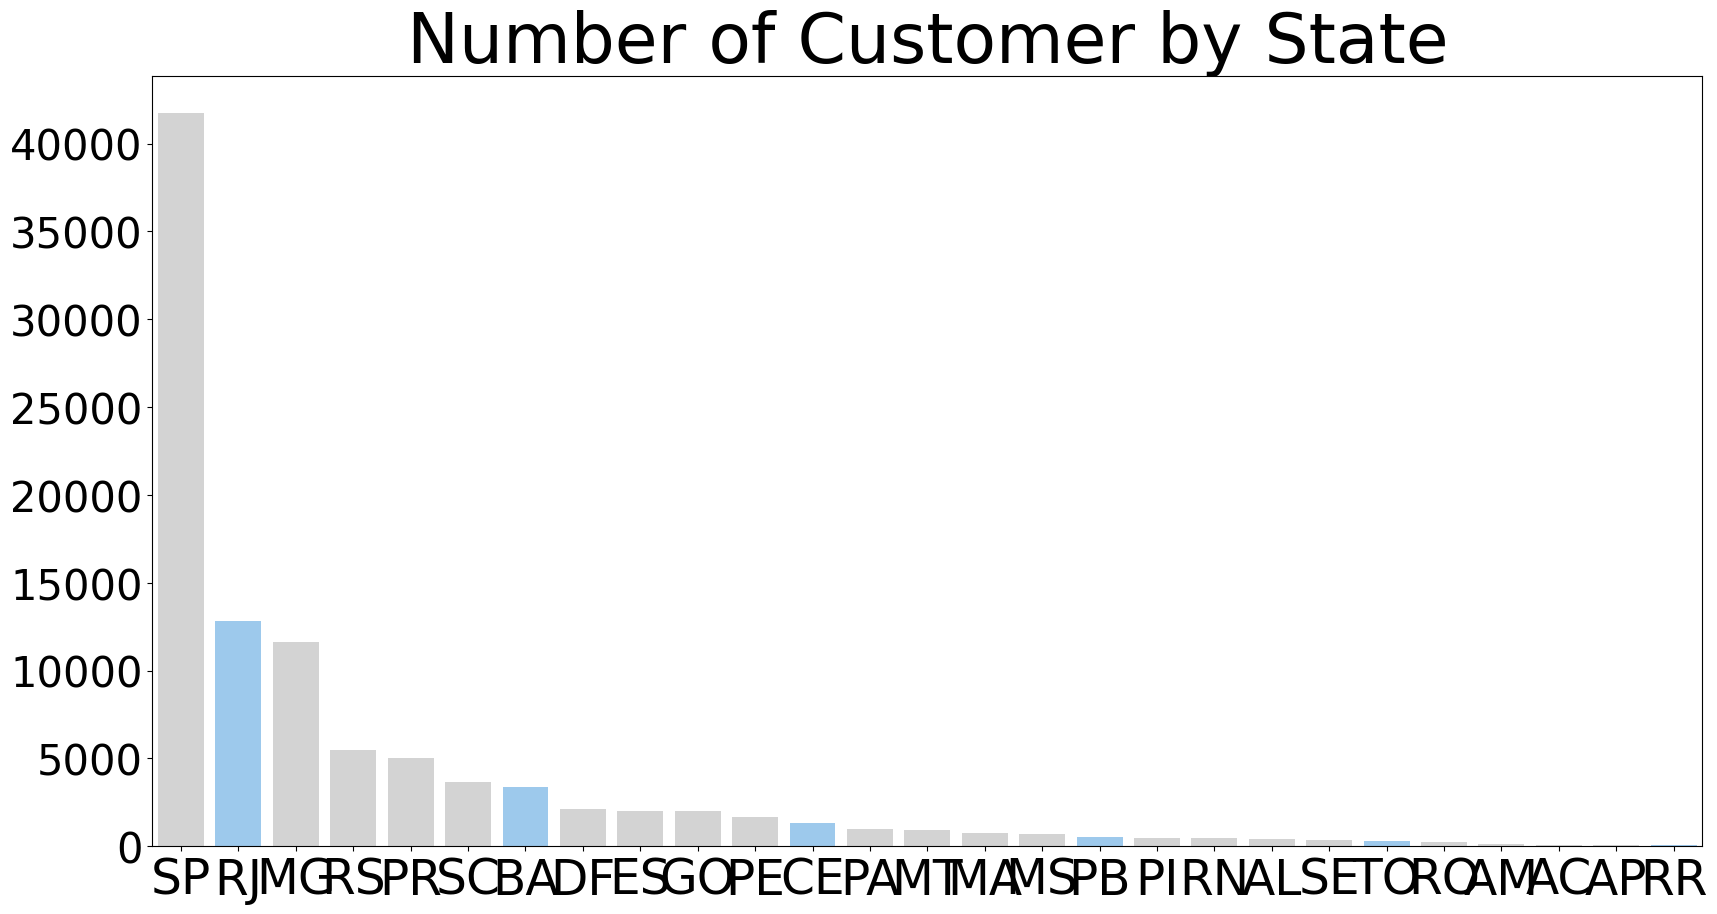

In [46]:
fig,ax = plt.subplots(figsize=(16,8))

ax.set_title("Revenue per Order", loc="center",fontsize = 30)
ax.set_ylabel("Revenue",fontsize = 25)
ax.set_xlabel("Order Amount",fontsize=25)
ax.plot(
    revenue_df["revenue"],
    revenue_df["order_count"],
    marker = "o",
    linewidth = 2,
    color ="#90CAF9"
)
ax.tick_params(axis="y", labelsize=20)
ax.tick_params(axis = "x",labelsize=15)


#Membuat grafik jumlah pelanggan tiap negara bagian 
fig, ax = plt.subplots(figsize=(20, 10))
 
colors = ["#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
        y="customer_count", 
        x="customer_state",
        data=customer_distribution_dataset.sort_values(by="customer_count", ascending=False),
        palette=colors,
        ax=ax
    )
ax.set_title("Number of Customer by State", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)
plt.show()


C:\Users\INTEL\AppData\Local\Temp\ipykernel_19324\3356265459.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_count",y="product_category_name",data=df_agg.sort_values(by ="product_count",ascending=False).head(5),palette=colors,ax=ax[0])
C:\Users\INTEL\AppData\Local\Temp\ipykernel_19324\3356265459.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_count",y="product_category_name",data=df_agg.sort_values(by="product_count",ascending=True).head(5),palette=colors,ax=ax[1])


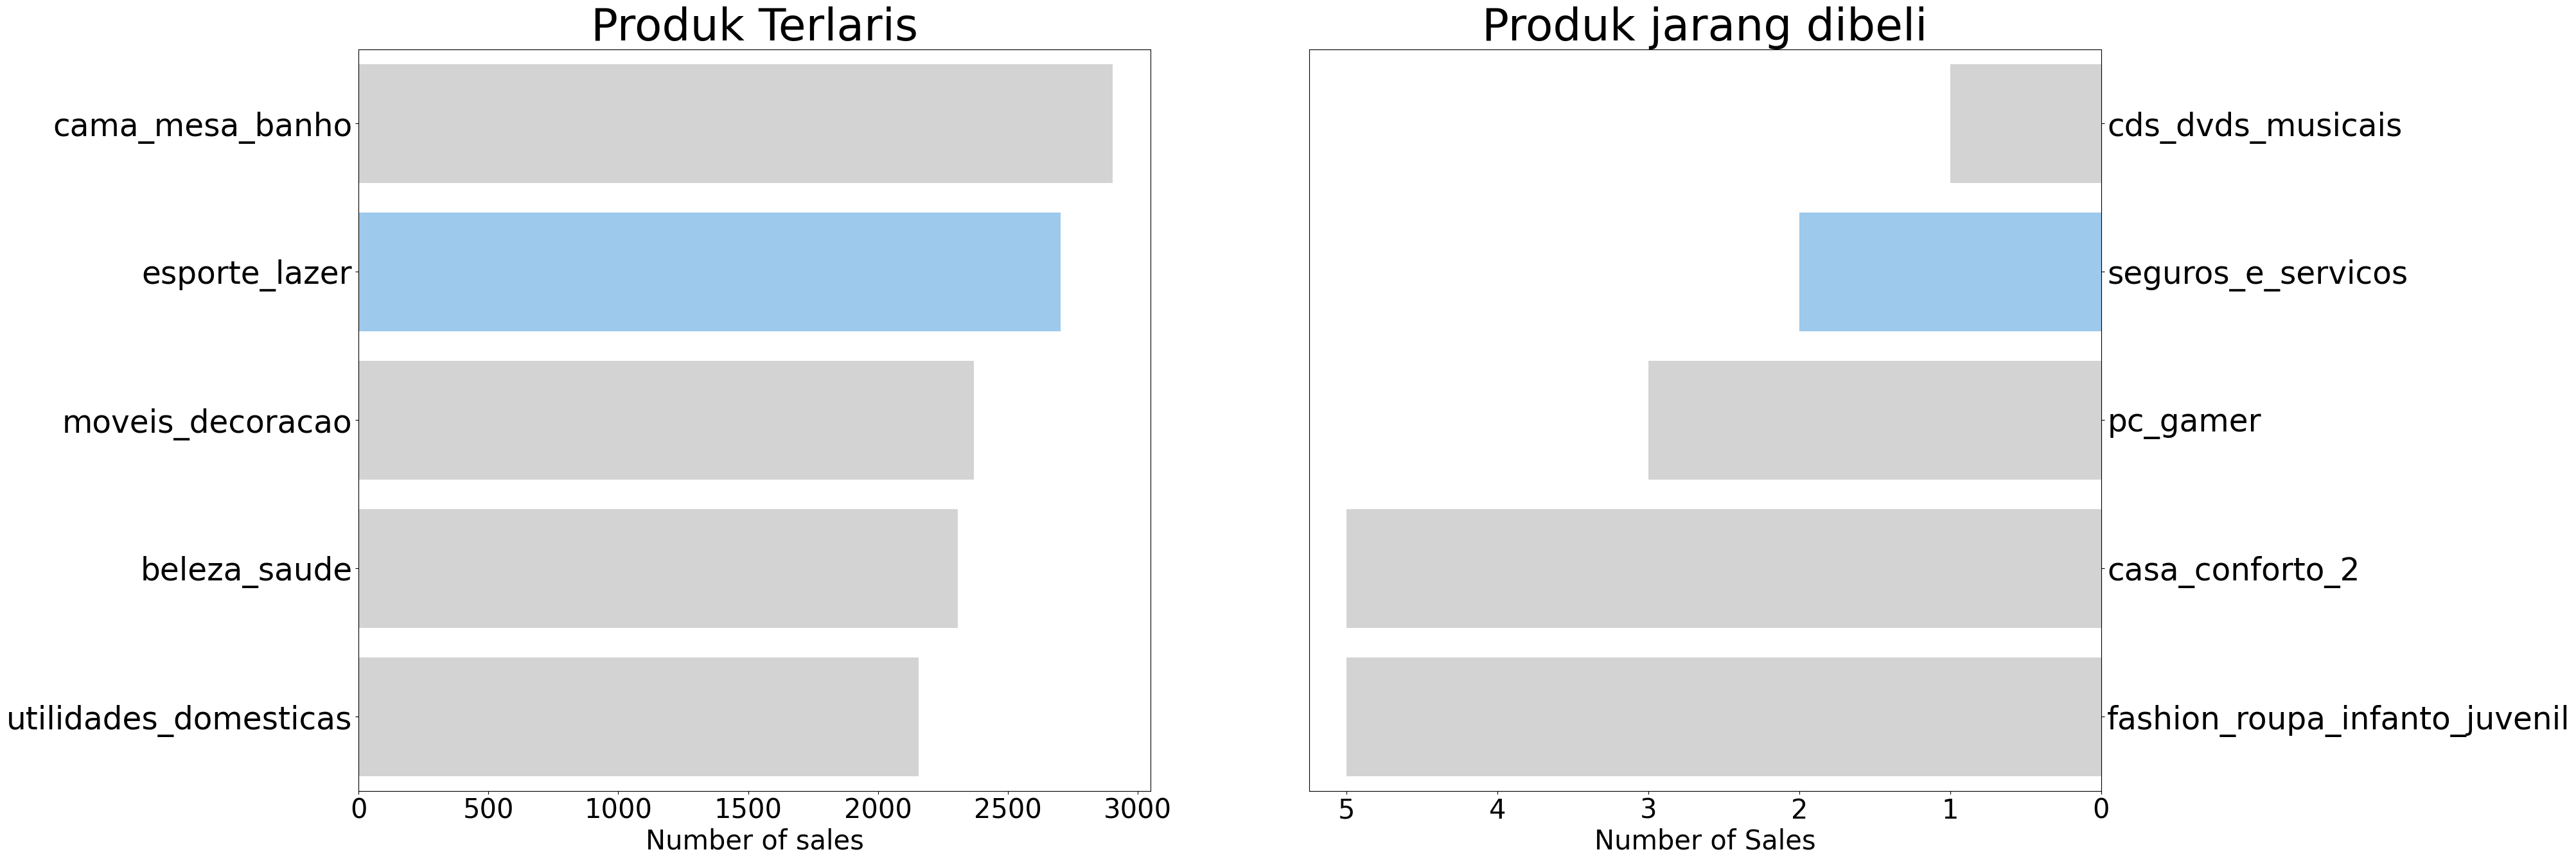

In [47]:
df_agg = all_data.groupby(by="product_category_name").agg(
    product_count = ("product_id","nunique"))

fig,ax =plt.subplots(nrows=1,ncols=2, figsize=(35,15))

color = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="product_count",y="product_category_name",data=df_agg.sort_values(by ="product_count",ascending=False).head(5),palette=colors,ax=ax[0])
ax[0].set_title("Produk Terlaris",loc="center",fontsize=50)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Number of sales",fontsize=30)
#ax[0].set_title("Best Performing Product",loc="center",fontsize=50)
ax[0].tick_params(axis='y',labelsize=35)
ax[0].tick_params(axis="x",labelsize=30)

#Ini grafik untuk produk terjeleknya
sns.barplot(x="product_count",y="product_category_name",data=df_agg.sort_values(by="product_count",ascending=True).head(5),palette=colors,ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Number of Sales",fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk jarang dibeli", loc="center", fontsize=50)
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

plt.show()

Berikutnya kita akan mencoba membandingkan antara bobot barang dan pengaruhnya terhadap ongkir

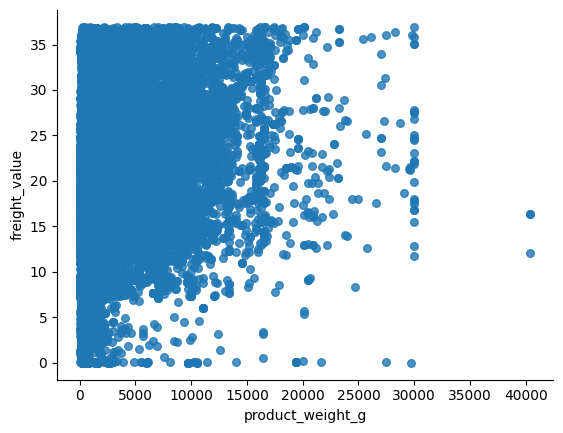

In [48]:
product_orderItem_df.plot(kind='scatter', x='product_weight_g', y='freight_value', s=30, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

Visualisasi data pada grafik diatas menunjukkan bahwa barang yang memiliki bobot rendah belum tentu memiliki harga ongkir yang juga rendah. Pada kenyataannya,ada barang dengan bobot 25 kg -30 kg dengan harga yang sama dengan bobot barang antara 0-5 kg. Hal ini menunjukkan bahwa bobot barang tidak memiliki pengaruh signifikan terhadap harga ongkir. Coba kita uji dengan volume barang thd ongkir

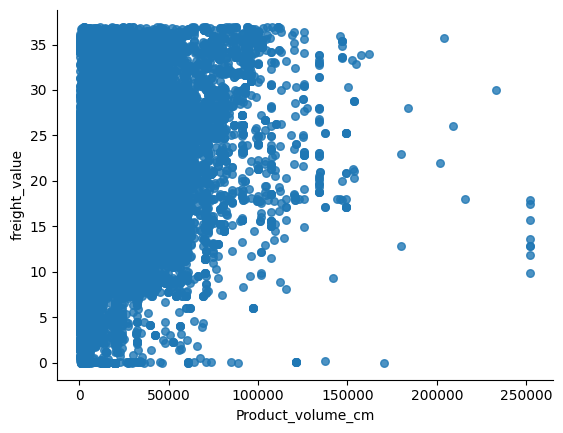

In [49]:
product_orderItem_df.plot(kind = "scatter", x="Product_volume_cm",y="freight_value",s=30, alpha=.8)
plt.gca().spines[['top','right']].set_visible(False)
plt.show()

Berdasarkan data diatas rentang volume yang rendah juga tidak selalu mendapatkan harga ongkir yang rendah juga. Ada harga ongkir yang berada pada rentang 100-200 atau bahkan lebih. Sebaliknya, volume barang yang besar (>25kg) juga tidak selalu mendapatkan harga ongkir yang mahal. Agar semakin yakin, akan digunakan korelasi pearson untuk membandingkan antara dimensi barang dan harga ongkir

In [50]:
product_orderItem_df[["product_weight_g","Product_volume_cm","freight_value"]].corr(method='pearson')

,product_weight_g,Product_volume_cm,freight_value
product_weight_g,1.000000,0.706129,0.353944
Product_volume_cm,0.706129,1.000000,0.307278
freight_value,0.353944,0.307278,1.000000


Berdasarkan analisis lanjutan dengan korelasi Pearson, diketahui
bahwa volume produk memiliki tingkat korelasi positif lemah di nilai 0.5876.

Begitupun juga dengan korelasi antara bobot product ("Product Weight") dengan ongkir bernilai positif lemah dengan nilai korelasi 0.61.

Dengan demikian **pertanyaan ke 5** mengenai pengaruh bobot dan volume barang terhadap ongkos kirim telah **terjawab**


## Conclusion ##

**Pertanyaan Bisnis 1 :Ada berapa jumlah pelanggan di tiap daerah/state?**
Berdasarkan pertanyaan bisnis tersebut : Ditemukan bahwa kota dengan inisial "SP" merupakan pelanggan terbanyak dengan nilai 40302 dan kota "RR" adalah kota dengan pelanggan paling sedikit


**Pertanyaan Bisnis 2 : Pembeli terbanyak ada di state mana?**



Berdasarkan pertanyaan tersebut, diketahui bahwa kota Sao Paulo dengan kode "SP" adalah pelanggan terbanyak dengan jumlah 40302 pelanggan

**Pertanyaan Bisnis 3 :Apakah ada barang yang tidak sampai pada pelanggan?Jika ada, di negara bagian mana saja?** 


Ada, berdasarkan data negara bagian dengan kode "AL","BA","CE" adalah negara bagian dimana pelanggannya melakukan cancel pada pembelian barang melalui platform online

**14.Produk apa yang memiliki harga   tertinggi dan produk apa yang memiliki harga terendah**


Produk yang memiliki barang tertinggi yaitu Beleza Saude (Produk kecantikan) dengan nilai 1263 Brazilian Real dan produk dengan harga terendah yaitu CD/DVD Musik dan Layanan & Asuransi (Seguros e Servicos) dengan nilai 2 Brazilian Real.

**5. Apakah ada korelasi antara volume
  barang pesanan dengan ongkir? Jika ada bagaimana korelasinya?**


Ada.Tetapi hasil analisis korelasi menunjukkan koefisien korelasi positif lemah yaitu 0.307278

**6. Barang apa saja yang paling laris dan barang apa yang paling tidak laku?**

Barang yang paling laku adalah produk Cama Mesa Banho(Furnitur dan Kasur) dan produk paling tidak laku adalah CD/DVD Musica dengan jumlah pembeli 1 orang.